In [ ]:

!pip install --user --upgrade pip
!pip install -U setuptools --user
!pip install mlflow
!pip install pandas
!pip install numpy
!pip install seaborn
!pip install sklearn
!pip install matplotlib
!pip install pycaret
!pip install ipywidgets


  Using cached mlflow-2.16.2-py3-none-any.whl.metadata (29 kB)
  Using cached mlflow_skinny-2.16.2-py3-none-any.whl.metadata (30 kB)
Using cached mlflow-2.16.2-py3-none-any.whl (26.7 MB)
Using cached mlflow_skinny-2.16.2-py3-none-any.whl (5.6 MB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
  Preparing metadata (setup.py) ... done
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 122.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 56.3 MB/s eta 0:00:00
   

In [ ]:

!pip install lightgbm --config-settings=cmake.define.USE_GPU=ON
!pip install --upgrade pycaret


In [ ]:
import mlflow
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

from pycaret.classification import *

from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
news_groups = fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'), shuffle=True)

dataframe = pd.DataFrame({'text_data': news_groups.data, 'class_target': news_groups.target})

X_train, X_test, y_train, y_test = train_test_split(dataframe['text_data'], dataframe['class_target'], test_size=0.15, random_state=42)

vectorizer = TfidfVectorizer(stop_words="english", max_df=0.5, sublinear_tf=True)
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

print(X_train.shape)
print(X_test.shape)

(9616, 95702)
(1698, 95702)


In [ ]:
experiment = setup(data = X_train, target = y_train.values, log_experiment = True, experiment_name = 'class_of_text_prediction', use_gpu = True)

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset migh

,Description,Value
0,Session id,2736
1,Target,target
2,Target type,Multiclass
3,Original data shape,"(9616, 95703)"
4,Transformed data shape,"(9616, 95703)"
5,Transformed train set shape,"(6731, 95703)"
6,Transformed test set shape,"(2885, 95703)"
7,Numeric features,95702
8,Preprocess,True
9,Imputation type,simple


2024/10/06 10:48:40 INFO mlflow.tracking.fluent: Experiment with name 'class_of_text_prediction' does not exist. Creating a new experiment.


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset migh

In [6]:
selected_models = ['ridge', 'svm', 'lr', 'et', 'rf']#, 'gbc', 'lightgbm', 'dt', 'ada']

best_model = compare_models(include=selected_models)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,10:49:33
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Ridge Classifier


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)


Processing:   0%|          | 0/25 [00:00<?, ?it/s]

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.7561,0.0000,0.7561,0.7632,0.7531,0.7429,0.7437,140.3910
svm,SVM - Linear Kernel,0.7520,0.0000,0.7520,0.7591,0.7497,0.7387,0.7394,140.1050
lr,Logistic Regression,0.7306,0.0000,0.7306,0.7478,0.7255,0.7161,0.7173,162.6600
et,Extra Trees Classifier,0.6821,0.9462,0.6821,0.6942,0.6784,0.6649,0.6661,232.3530
rf,Random Forest Classifier,0.6605,0.9426,0.6605,0.6718,0.6563,0.6422,0.6434,202.1710


2024/10/06 13:37:28 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/06 13:37:29 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/06 13:37:30 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/06 13:37:31 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/06 13:37:33 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


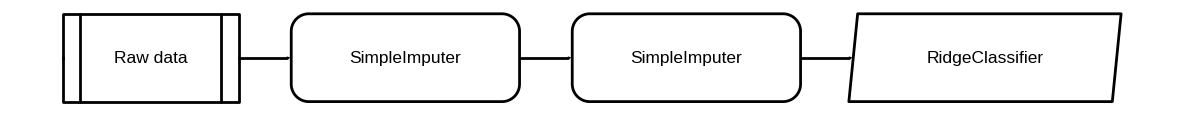

In [7]:
experiment.evaluate_model(best_model)

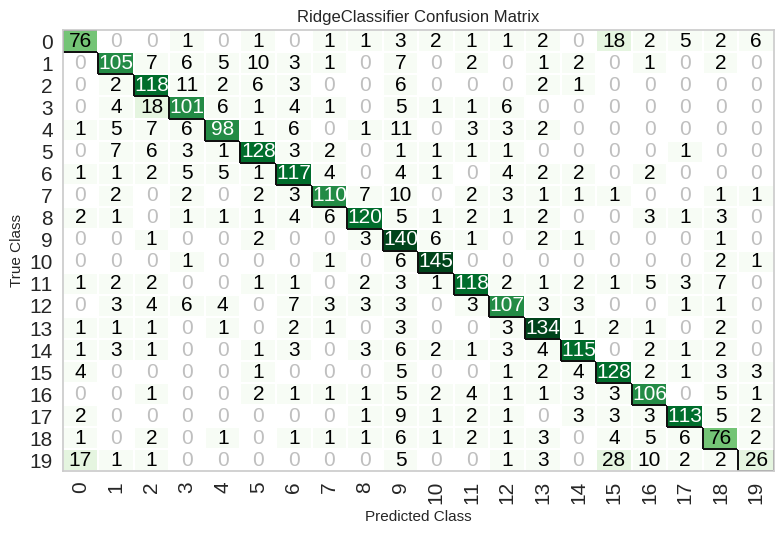

In [24]:
plot_model(best_model, plot = 'confusion_matrix')

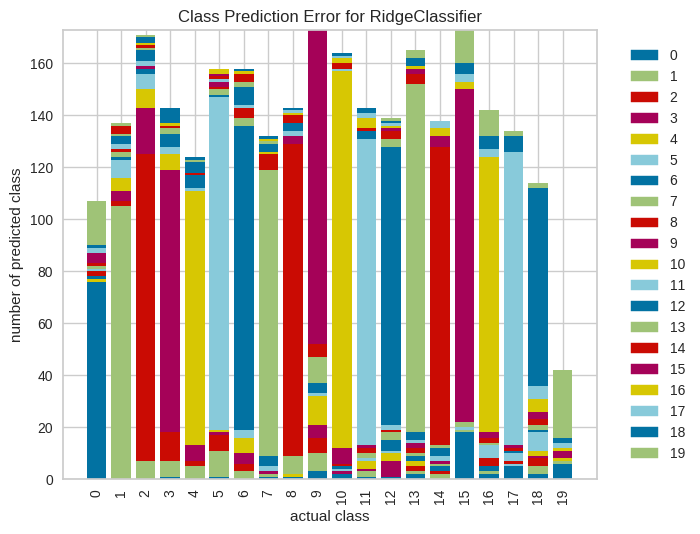

In [23]:
plot_model(best_model, plot = 'error')

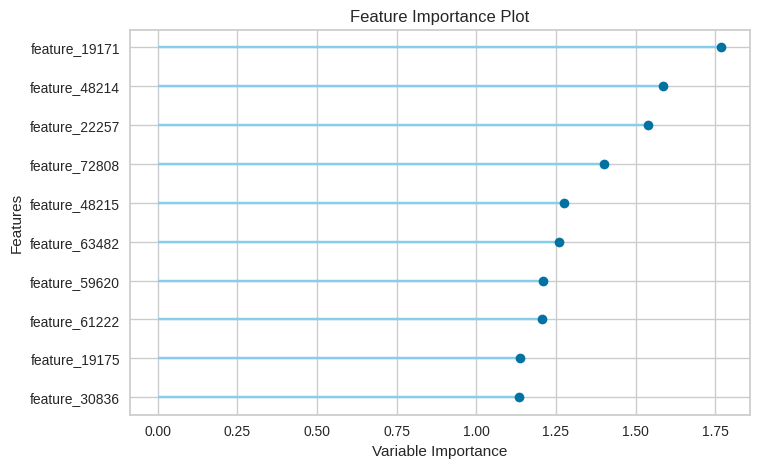

In [10]:
plot_model(best_model, plot = 'feature')

In [11]:
y_predicted = best_model.predict(X_test)
accuracy_score(y_test.values, y_predicted)

0.7461719670200235

Text(0.5, 80.7222222222222, 'actual')

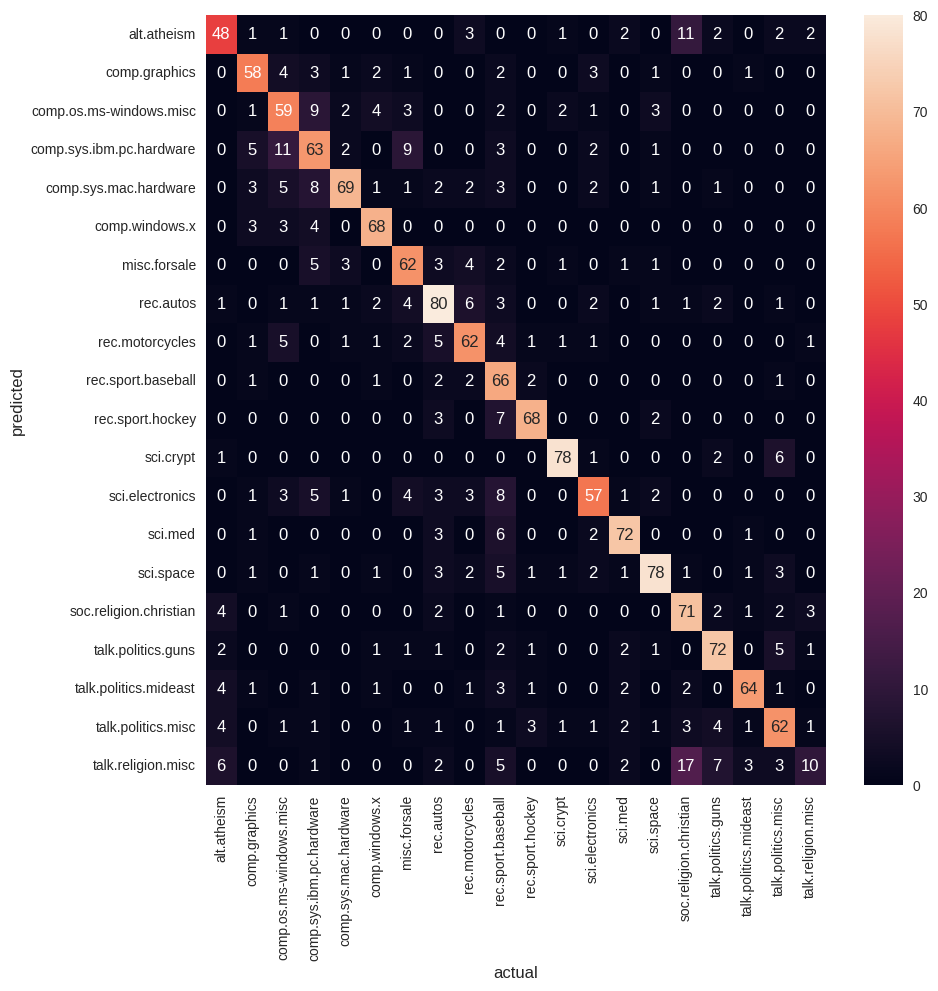

In [12]:
conf_matrix = confusion_matrix(y_test.values, y_predicted)
class_names = news_groups['target_names']

plt.figure(figsize = (10,10))
svm = sns.heatmap(conf_matrix, annot = True, xticklabels = class_names, yticklabels = class_names, fmt='g')
plt.ylabel('predicted', fontsize = 12)
plt.xlabel('actual', fontsize = 12)

In [13]:
report = classification_report(y_test.values, y_predicted)
print(report)

              precision    recall  f1-score   support

           0       0.69      0.66      0.67        73
           1       0.75      0.76      0.76        76
           2       0.63      0.69      0.66        86
           3       0.62      0.66      0.64        96
           4       0.86      0.70      0.78        98
           5       0.83      0.87      0.85        78
           6       0.70      0.76      0.73        82
           7       0.73      0.75      0.74       106
           8       0.73      0.73      0.73        85
           9       0.54      0.88      0.67        75
          10       0.88      0.85      0.87        80
          11       0.92      0.89      0.90        88
          12       0.77      0.65      0.70        88
          13       0.85      0.85      0.85        85
          14       0.85      0.77      0.81       101
          15       0.67      0.82      0.74        87
          16       0.78      0.81      0.80        89
          17       0.89    